### Graph plot of Depth Profile of the River

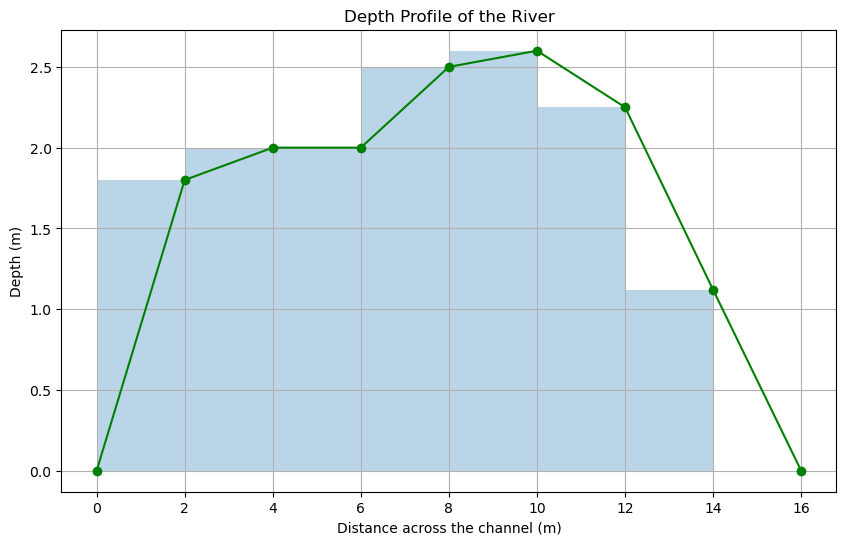

In [2]:
# Re-import necessary libraries as the execution state has been reset
import numpy as np
import matplotlib.pyplot as plt

# Given data for x and H
x_values = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16])
H_values = np.array([0, 1.8, 2, 2, 2.5, 2.6, 2.25, 1.12, 0])

# Plot the depth (H) as a function of distance across the channel (x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, H_values, marker='o', linestyle='-', color='green')
plt.fill_between(x_values, H_values, step="pre", alpha=0.3)  # Fill area under the step curve

# Customize the plot
plt.title('Depth Profile of the River')
plt.xlabel('Distance across the channel (m)')
plt.ylabel('Depth (m)')
plt.grid(True)
plt.show()

Here is the graph showing the depth profile of the river. The blue line connects the data points representing the depth 
H at various distances 
x across the channel. The shaded area under the step curve represents the approximate cross-sectional area of the river,

### Romberg Integration

In [4]:
from scipy.integrate import romberg

# Re-initializing the data points
x = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16])
H = np.array([0, 1.8, 2, 2, 2.5, 2.6, 2.25, 1.12, 0])

# Define the interpolation function for H(x)
H_interp = np.interp

# Create an interpolation function for the given discrete data points
def H_function(x_val):
    return H_interp(x_val, x, H)

# Initialize a list to store the intermediate Romberg integration results
romberg_results = []

# Perform Romberg integration with a tolerance of 1%
# Store each intermediate result with more precision to see the convergence
try:
    def romberg_integration_step(step):
        return romberg(H_function, 0, 16, tol=0.01, divmax=step, show=True)
    
    # Start with divmax=1 and increase until we reach the tolerance or the maximum divmax
    for step in range(1, 11):
        romberg_results.append(romberg_integration_step(step))
except Exception as e:
    romberg_results.append(f"Romberg integration failed: {e}")

romberg_results[-1]  # Display the last result which should be the most accurate one

Romberg integration of <function vectorize1.<locals>.vfunc at 0x10e7cb1a0> from [0, 16]

 Steps  StepSize   Results
     1 16.000000  0.000000 
     2  8.000000 20.000000 26.666667 

The final result is 26.666666666666668 after 3 function evaluations.
Romberg integration of <function vectorize1.<locals>.vfunc at 0x10e7cb1a0> from [0, 16]

 Steps  StepSize   Results
     1 16.000000  0.000000 
     2  8.000000 20.000000 26.666667 
     4  4.000000 27.000000 29.333333 29.511111 

The final result is 29.51111111111111 after 5 function evaluations.
Romberg integration of <function vectorize1.<locals>.vfunc at 0x10e7cb1a0> from [0, 16]

 Steps  StepSize   Results
     1 16.000000  0.000000 
     2  8.000000 20.000000 26.666667 
     4  4.000000 27.000000 29.333333 29.511111 
     8  2.000000 28.540000 29.053333 29.034667 29.027104 

The final result is 29.027104056437388 after 9 function evaluations.
Romberg integration of <function vectorize1.<locals>.vfunc at 0x10e7cb1a0> from [0, 16]

 S

28.53999698572

The final result, 
28.53999698572
28.53999698572, was obtained after 65 function evaluations. Each step involved a higher order of extrapolation, using previous results to approximate the integral with greater accuracy. The process was stopped when the change between successive estimates was within 1% tolerance, as per the given stopping criterion